# Importancia características

Partiendo de un modelo de random forest entrenado en el conjunto de datos de entrenamiento, se forma una imagen que representa la importancia de cada característica.

Parte del código de Gèron "Hands-on Machine Learning".

In [1]:
import sys, os, time, functools
sys.path.append('/home/jovyan/work/databases/HASY/')
from hasy_tools_updated import *
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier 

In [2]:
X_train, y_train, symbol_id2index_train, index2symbol_id_train = load_database(f'/home/jovyan/work/databases/HASY/benat-data/train.csv')

In [4]:
%%time
rf=RandomForestClassifier(n_estimators=100, max_depth=45)
rf.fit(X_train,y_train)

CPU times: user 3min 17s, sys: 9.66 s, total: 3min 27s
Wall time: 3min 27s


RandomForestClassifier(max_depth=45)

In [5]:
from joblib import dump, load
dump(rf, 'rf_example.joblib') 

['rf_example.joblib']

In [6]:
#rf = load('rf_example.joblib') 

In [37]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import scienceplots
# Figure features
plt.style.use(['science', 'ieee'])#, 'grid'
plt.rcParams.update({
    "font.family": "Palatino",
})

# Example values from the book, for MNIST:
vmin_mnist = 0.0
vmax_mnist = 0.009791489757332336

def plot_digit(data, vmin, vmax):
    image = data.reshape(32, 32)
    plt.imshow(image, cmap = mpl.cm.hot,
               interpolation="nearest",
               vmin = vmin, vmax=vmax)
    plt.axis("off")

[0.0003136274418146272, 0.0018462923827338145]

## Se utiliza la misma escala de color que con MNIST

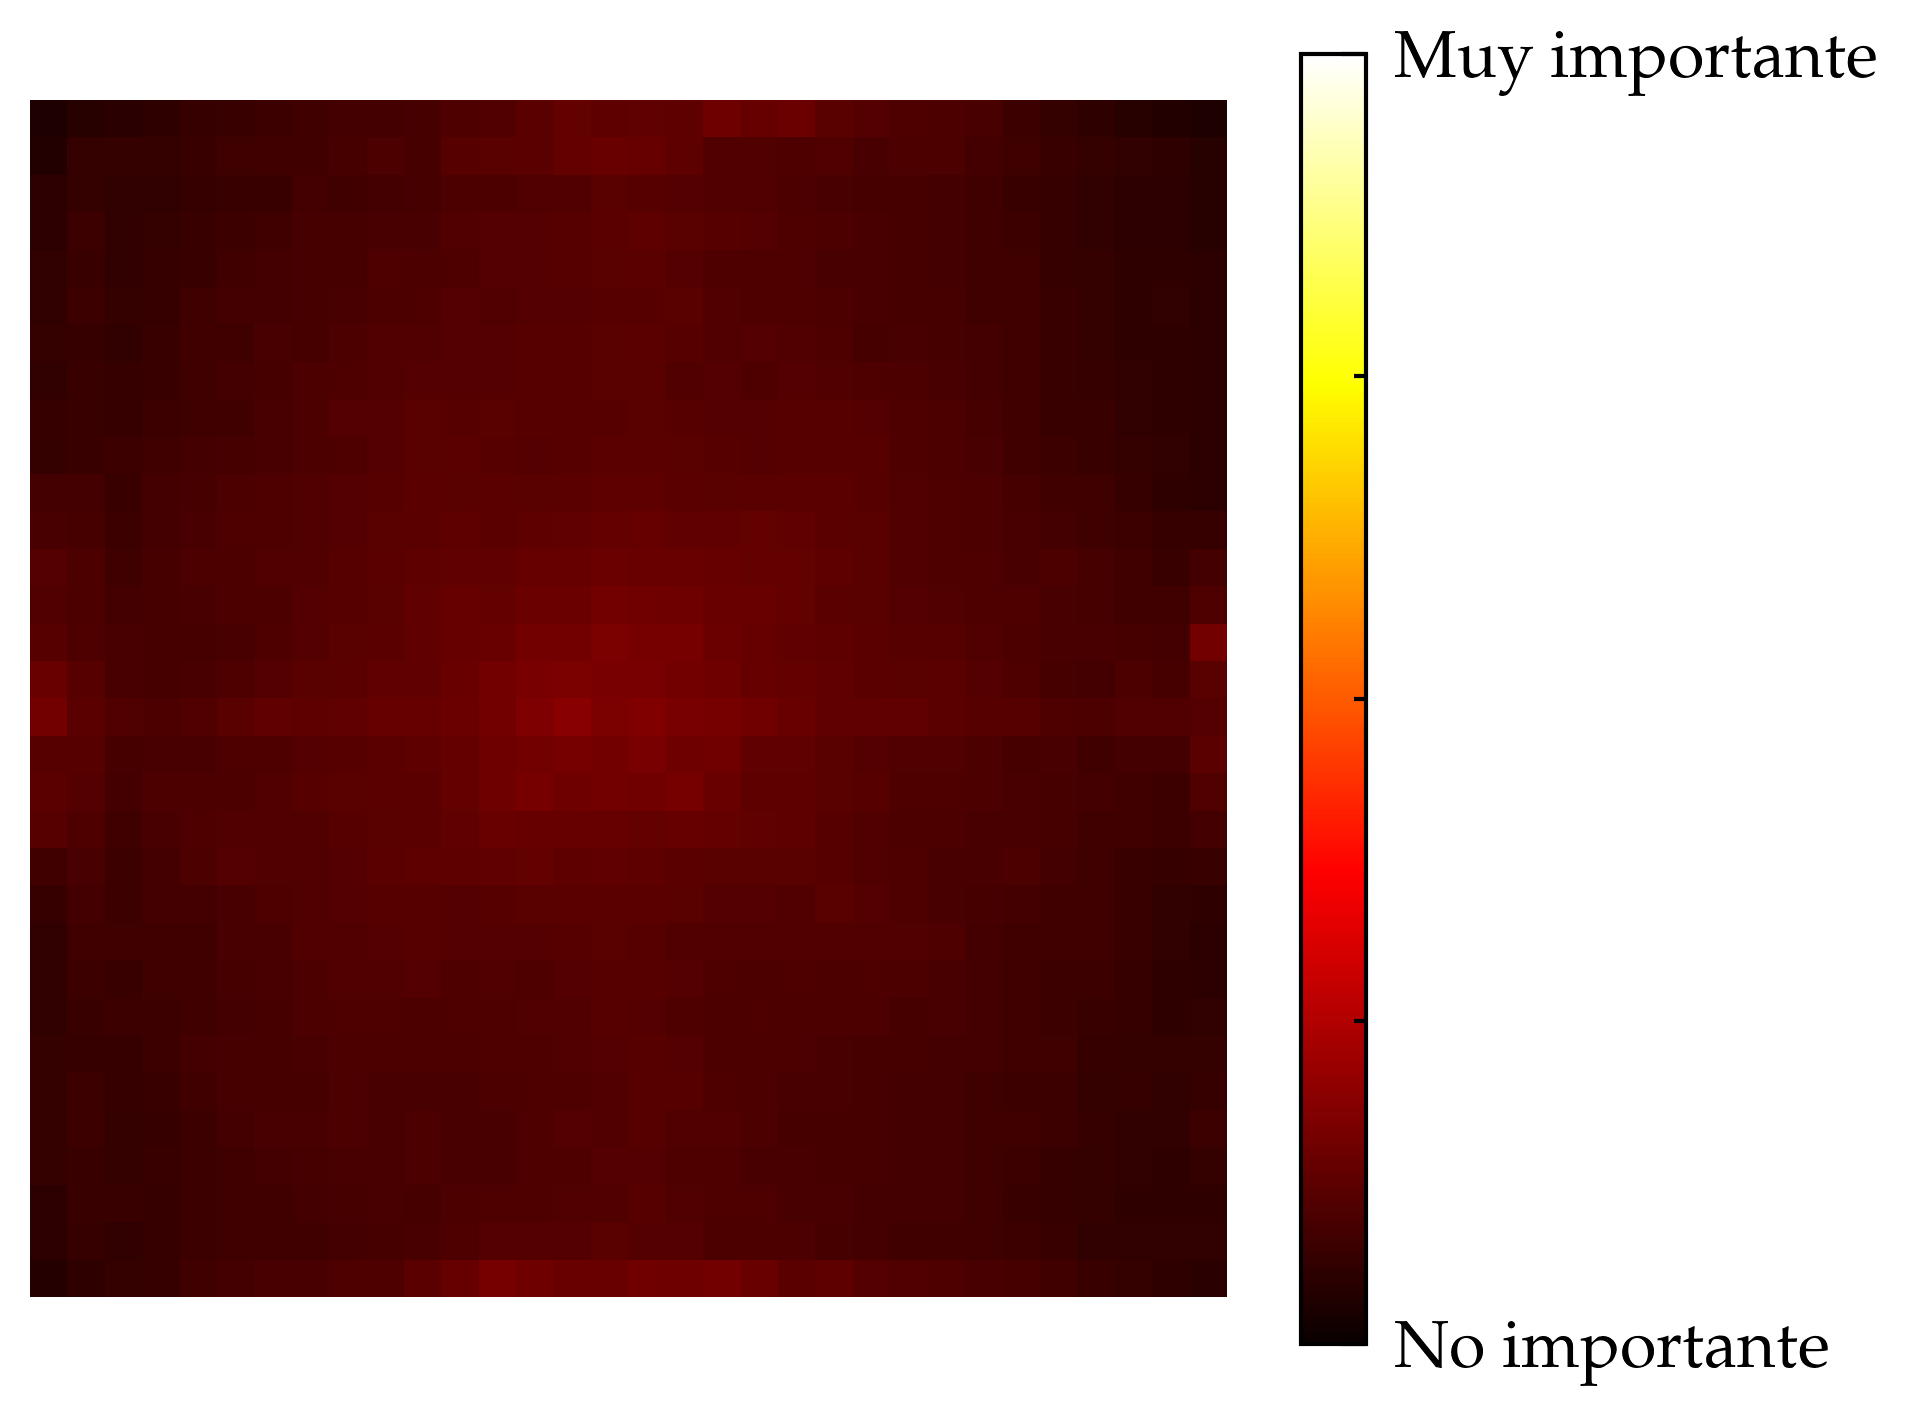

In [32]:
plot_digit(rf.feature_importances_, vmin_mnist, vmax_mnist)
cbar = plt.colorbar(ticks=[vmin_mnist, vmax_mnist])
cbar.ax.set_yticklabels(['No importante', 'Muy importante'])
plt.tight_layout()
plt.savefig("HASY_rel_scale.pdf")

## Tomando como escala únicamente las imágenes de HASY

In [31]:
vmin_HASY = rf.feature_importances_.min()
vmax_HASY = rf.feature_importances_.max()

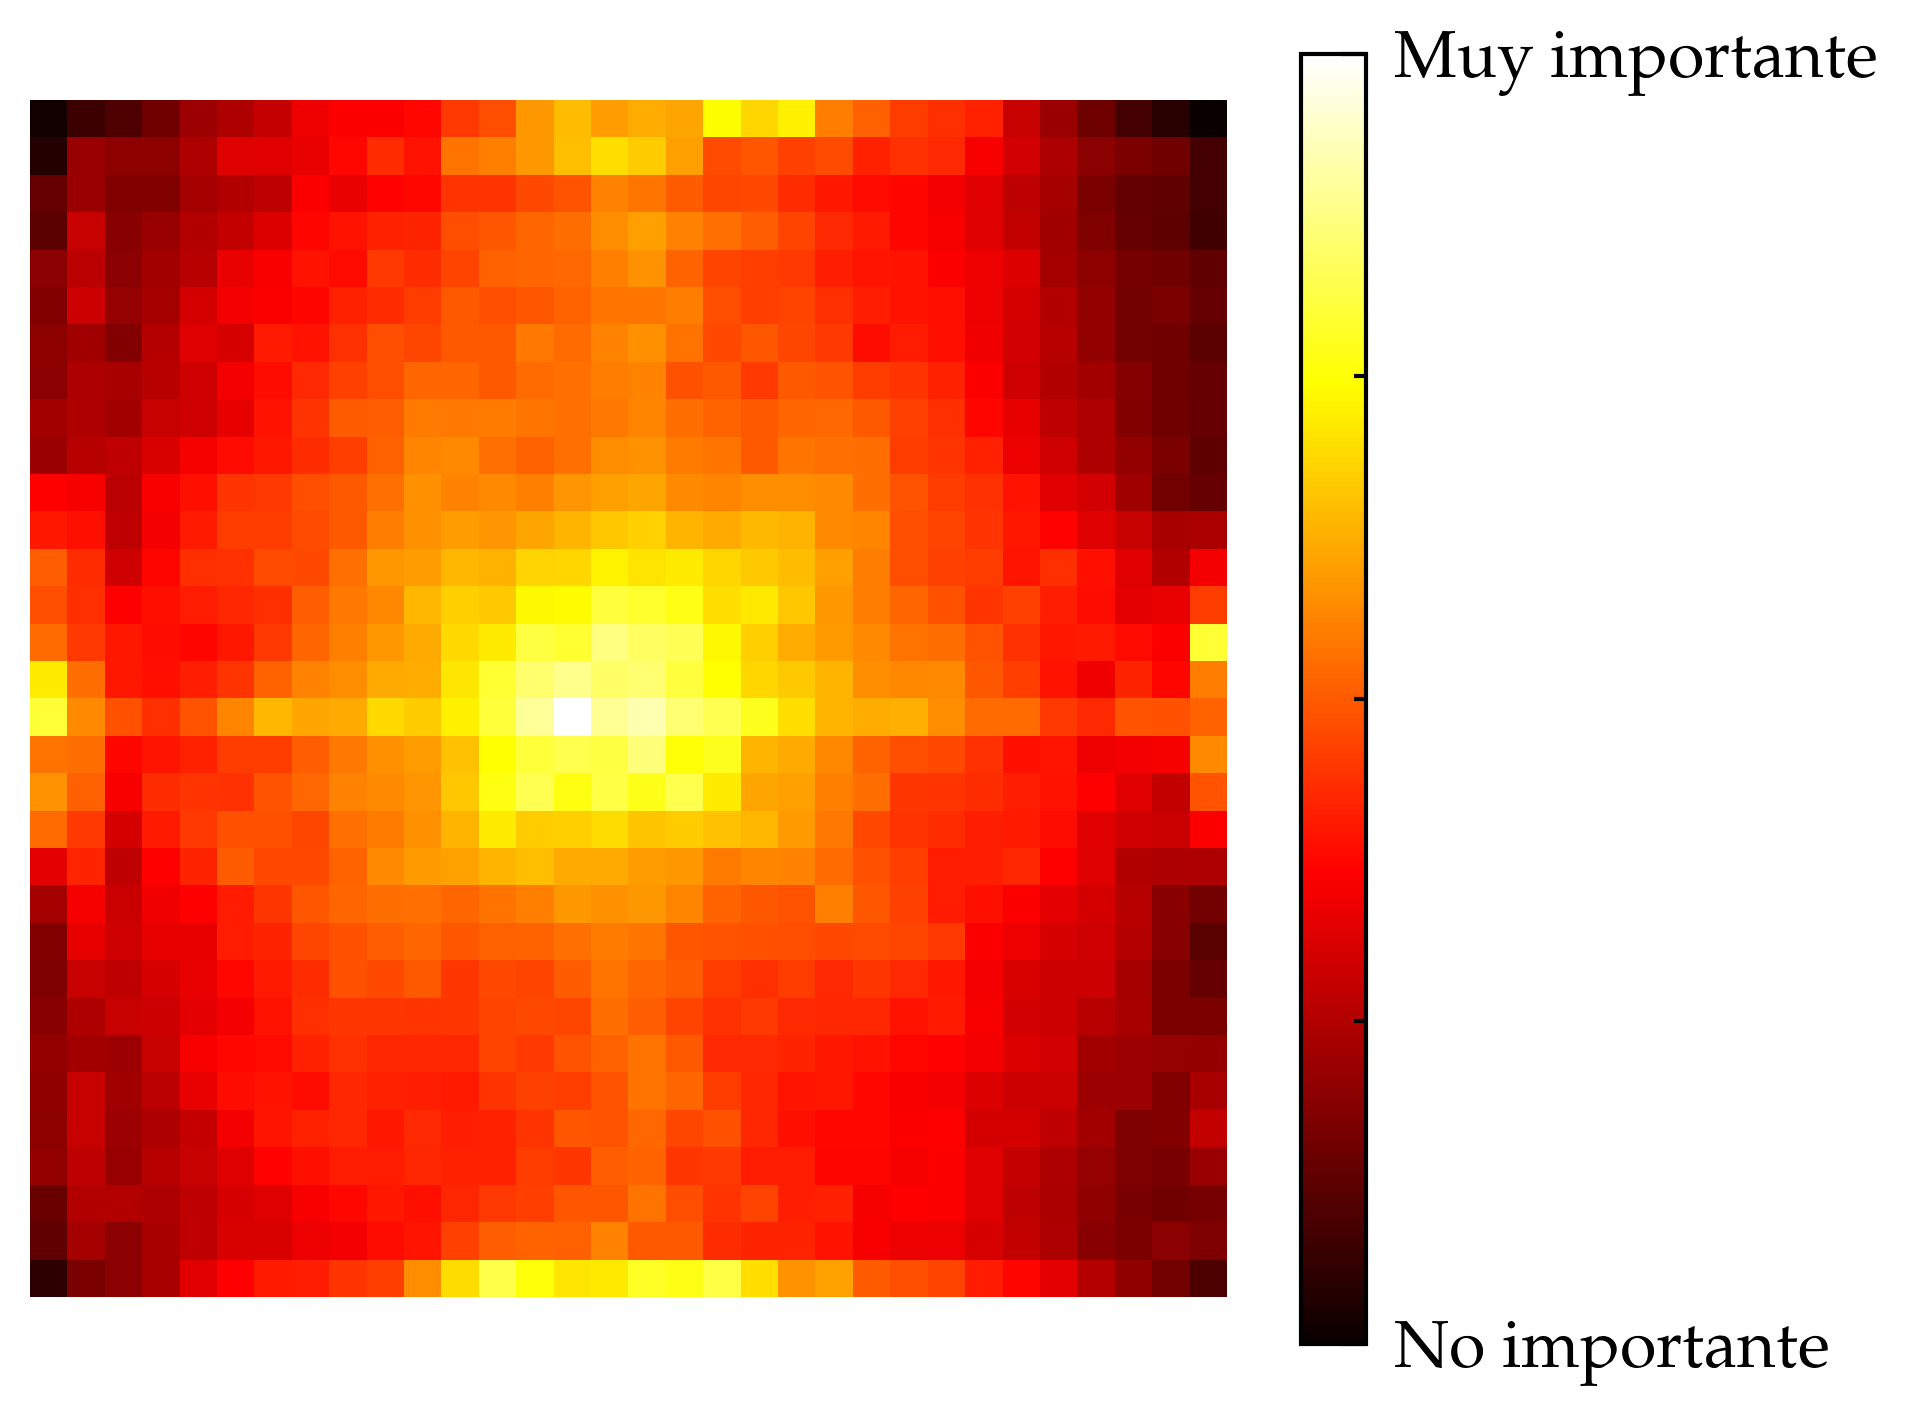

In [38]:
plot_digit(rf.feature_importances_, vmin_HASY, vmax_HASY)
cbar = plt.colorbar(ticks=[vmin_HASY, vmax_HASY])
cbar.ax.set_yticklabels(['No importante', 'Muy importante'])
plt.tight_layout()
plt.savefig("HASY_abs_scale.pdf")